In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm.auto import tqdm
from matplotlib.path import Path
import ast
import pickle
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
import networkx as nx
from collections import Counter
import nxviz as nv

/home/jupyter-psillano/.local/lib/python3.7/site-packages/nxviz/__init__.py:29: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  """


# Analysis

In [5]:
MIN_TILES = 2

In [6]:
import random
G=nx.Graph()
fh=open('network_random_arts_100.csv','r')


for line in fh.readlines():
    s=line.strip().split(',')
    if int(s[2]) > MIN_TILES:
        if random.random() < 1:
            G.add_edge(str(s[0]), int(s[1]), weight = int(s[2]))
fh.close()  

In [7]:
len(G.nodes)

699444

## proiezioni arts
### proiezioni unweighted

In [8]:
arts = nx.bipartite.sets(G)[0]
#users = nx.bipartite.sets(G)[1]
len(arts)

100

In [9]:
A = bipartite.projected_graph(G,arts)

In [10]:
for n, d in A.nodes(data=True):
    A.nodes[n]["degree"] = A.degree()[n] / 25
    

In [11]:
A.nodes(data=True)

NodeDataView({'49': {'degree': 3.36}, '93': {'degree': 3.92}, '21': {'degree': 3.76}, '0': {'degree': 3.56}, '19': {'degree': 3.4}, '67': {'degree': 3.88}, '87': {'degree': 3.8}, '82': {'degree': 3.96}, '56': {'degree': 3.8}, '12': {'degree': 3.92}, '75': {'degree': 3.72}, '65': {'degree': 3.88}, '13': {'degree': 3.84}, '2': {'degree': 3.92}, '22': {'degree': 3.96}, '52': {'degree': 3.96}, '6': {'degree': 3.64}, '29': {'degree': 3.92}, '77': {'degree': 3.92}, '18': {'degree': 3.92}, '86': {'degree': 3.64}, '36': {'degree': 3.72}, '10': {'degree': 3.36}, '35': {'degree': 3.52}, '92': {'degree': 3.84}, '14': {'degree': 3.88}, '15': {'degree': 3.84}, '37': {'degree': 3.96}, '7': {'degree': 3.92}, '47': {'degree': 3.24}, '84': {'degree': 3.96}, '32': {'degree': 3.56}, '70': {'degree': 3.96}, '46': {'degree': 3.96}, '44': {'degree': 3.92}, '31': {'degree': 3.92}, '62': {'degree': 2.76}, '69': {'degree': 3.96}, '41': {'degree': 3.72}, '55': {'degree': 3.88}, '64': {'degree': 3.96}, '76': {'d

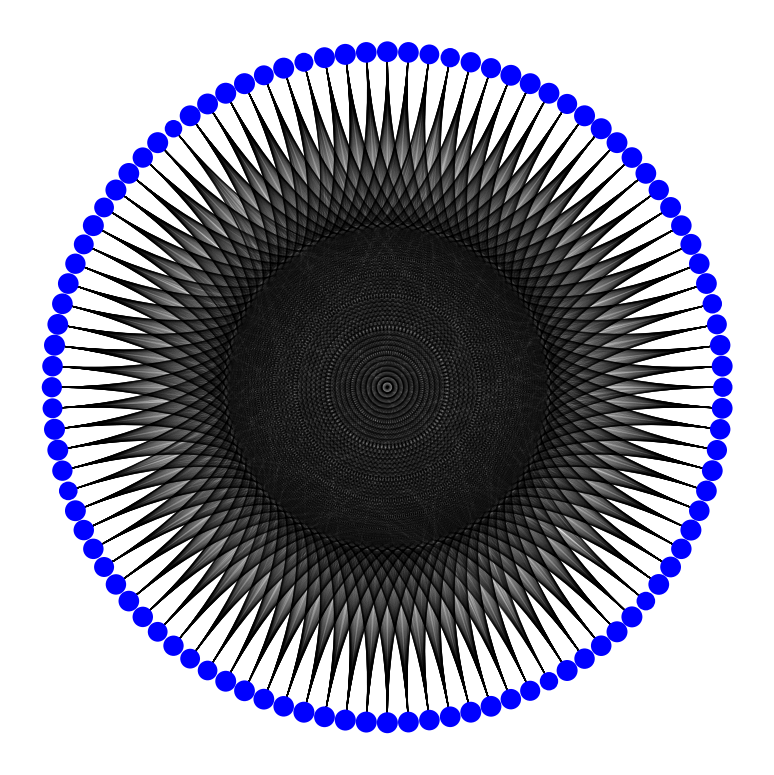

<Figure size 432x288 with 0 Axes>

In [13]:
plt.figure(figsize=(20,14))
nv.circos(
    A,
    node_size_by= 'degree',
    #group_by="group",
    #node_color_by="group",
    #edge_alpha_by="weight",#transparency
    #edge_lw_by="weight",    # linewidth of the edges
    node_enc_kwargs={"size_scale": 0.5}
)

plt.show()
plt.savefig('projections/arts_unweighted_100.png',dpi = 300)

In [10]:
from networkx.algorithms.community import greedy_modularity_communities
c = greedy_modularity_communities(A)
sorted(c[0])

['0',
 '1',
 '11',
 '13',
 '14',
 '17',
 '18',
 '19',
 '20',
 '22',
 '23',
 '24',
 '25',
 '26',
 '28',
 '29',
 '3',
 '31',
 '32',
 '33',
 '34',
 '36',
 '37',
 '39',
 '4',
 '40',
 '43',
 '45',
 '46',
 '48',
 '51',
 '55',
 '57',
 '6',
 '62',
 '63',
 '65',
 '66',
 '67',
 '68',
 '7',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '78',
 '79',
 '81',
 '83',
 '87',
 '9',
 '91',
 '93',
 '94',
 '97']

### proiezioni weighted

In [40]:
A = bipartite.weighted_projected_graph(G,arts)

In [41]:
remotion = []
for (u, v, d) in A.edges(data=True):
    if d["weight"] > 2000:
        remotion.append((u,v))
A.remove_edges_from(remotion)

In [42]:
for n, d in A.nodes(data=True):
    A.nodes[n]["degree"] = A.degree()[n] / 25
for (u, v, d) in A.edges(data=True):
    d["weight"] =  d["weight"] / 100

In [16]:
A.nodes(data=True)

NodeDataView({'49': {'degree': 3.36}, '93': {'degree': 3.92}, '21': {'degree': 3.76}, '0': {'degree': 3.56}, '19': {'degree': 3.4}, '67': {'degree': 3.88}, '87': {'degree': 3.8}, '82': {'degree': 3.96}, '56': {'degree': 3.8}, '12': {'degree': 3.92}, '75': {'degree': 3.72}, '65': {'degree': 3.88}, '13': {'degree': 3.84}, '2': {'degree': 3.92}, '22': {'degree': 3.96}, '52': {'degree': 3.96}, '6': {'degree': 3.64}, '29': {'degree': 3.92}, '77': {'degree': 3.92}, '18': {'degree': 3.92}, '86': {'degree': 3.64}, '36': {'degree': 3.72}, '10': {'degree': 3.36}, '35': {'degree': 3.52}, '92': {'degree': 3.84}, '14': {'degree': 3.88}, '15': {'degree': 3.84}, '37': {'degree': 3.96}, '7': {'degree': 3.92}, '47': {'degree': 3.24}, '84': {'degree': 3.96}, '32': {'degree': 3.56}, '70': {'degree': 3.96}, '46': {'degree': 3.96}, '44': {'degree': 3.92}, '31': {'degree': 3.92}, '62': {'degree': 2.76}, '69': {'degree': 3.96}, '41': {'degree': 3.72}, '55': {'degree': 3.88}, '64': {'degree': 3.96}, '76': {'d

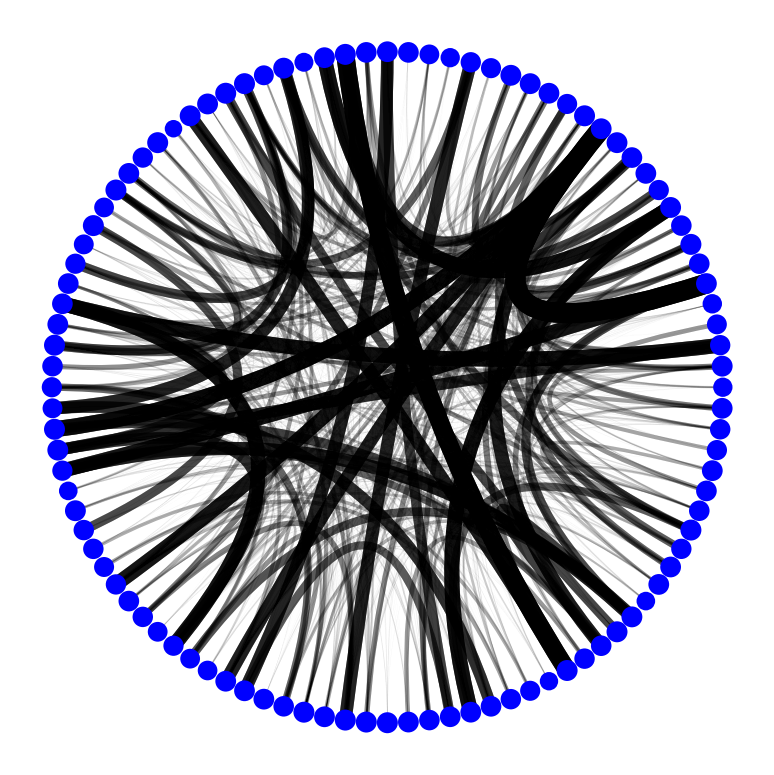

<Figure size 432x288 with 0 Axes>

In [43]:
plt.figure(figsize=(20,14))
nv.circos(
    A,
    #group_by="group",
    #node_color_by="group",
    node_size_by= 'degree',
    edge_alpha_by="weight",#transparency
    edge_lw_by="weight",    # linewidth of the edges
    node_enc_kwargs={"size_scale": 0.5}
)

plt.show()
plt.savefig('projections/arts_weighted_100.png',dpi = 300)

### proiezioni weighted 2nd method

In [55]:
A = bipartite.collaboration_weighted_projected_graph(G,arts)

In [56]:
weight = []
for (u, v, d) in A.edges(data=True):
    weight.append(d["weight"])
l = sorted(weight,reverse=True)

In [57]:
remotion = []
for (u, v, d) in A.edges(data=True):
    if d["weight"] > 1000:
        remotion.append((u,v))
A.remove_edges_from(remotion)

In [58]:
for n, d in A.nodes(data=True):
    A.nodes[n]["degree"] = A.degree()[n] / 25
for (u, v, d) in A.edges(data=True):
    d["weight"] =  d["weight"] / 100

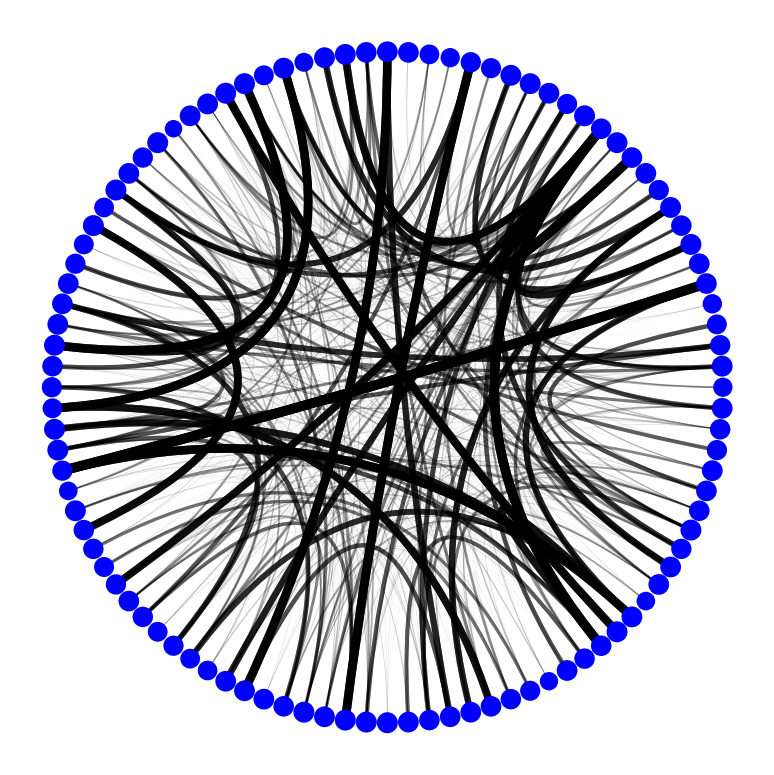

<Figure size 432x288 with 0 Axes>

In [59]:
plt.figure(figsize=(20,14))
nv.circos(
    A,
    #group_by="group",
    #node_color_by="group",
    node_size_by= 'degree',
    edge_alpha_by="weight",#transparency
    edge_lw_by="weight",    # linewidth of the edges
    node_enc_kwargs={"size_scale": 0.5}
)

plt.show()
plt.savefig('projections/arts_weighted_2nd_100.png',dpi = 300)